# Statistiques

Ce notebook va vous présenter différantes statistiques sur les mot contenus dans mon mémoire.

In [9]:
import pandas as pan;
import numpy as np;
import io;
import matplotlib.pyplot as plt;

f = io.open("OriginesEvolutionInformatique/OriginesEvolutionInformatique.md", mode="r", encoding="utf-8")
initialText = f.read()
text = initialText;
formattedText = initialText;

def removeCharactersInText(chars, txt):
    for char in chars:
        txt = txt.replace(char, "")
    return txt

charactersToRemove = ["#", "*", ",", "."]
formattedText = removeCharactersInText(charactersToRemove, formattedText);
text = removeCharactersInText(charactersToRemove, text);

def replaceCharactersInTextBySpace(charactersToReplaceBySpace, txt):
    for char in charactersToReplaceBySpace:
        txt = txt.replace(char, " ")

    return txt;

charactersToReplaceBySpace = ["'", "'", "’"]
formattedText = replaceCharactersInTextBySpace(charactersToReplaceBySpace, formattedText);


def removeEmptyStrings(item):
    return item != ""

def displaySerie(serie, figsize=(20, 20), type = ""): 
    print(len(serie.index))
    plt.figure(figsize=figsize)
    plt.xticks(rotation=45, horizontalalignment='right')
    if type == "hist":
        serie.plot.hist()
    elif type == "bar":
        serie.plot.bar()
    elif type == "barh":
        serie.plot.barh()
        plt.gca().invert_yaxis()
    else:
        plt.plot(serie.index, serie.values)
    plt.show()

def splitTextToWords(lines):
    return pan.Series(
        list(
            filter(removeEmptyStrings, " ".join(lines).split(" "))
        )
    )

lines = text.split("\n")
formattedLines = formattedText.split("\n")
wordList = splitTextToWords(lines);
formattedWordList = splitTextToWords(formattedLines);

values_count = formattedWordList.value_counts();

values_more_than_5_letters = values_count[values_count.index.str.len() > 5].loc[lambda x : x > 30]

values_count_over_70 = values_count.loc[lambda x : x > 70]
values_count_35_70 = values_count.loc[lambda x : (x > 35) & (x <= 70)]
values_count_17_34 = values_count.loc[lambda x : (x > 17) & (x <= 35)]
values_count_3_16 = values_count.loc[lambda x : (x > 3) & (x <= 16)]

In [10]:
print(f'Nombre de mots : {len(wordList)}');

Nombre de mots : 44970


39


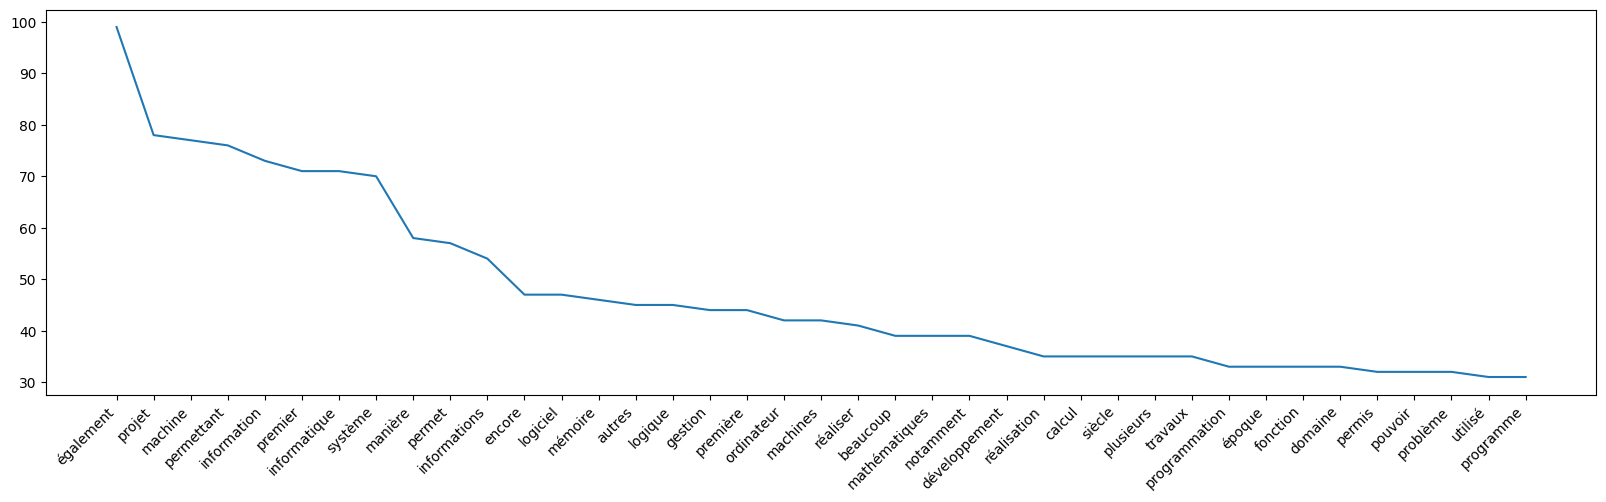

In [11]:
displaySerie(values_more_than_5_letters, (20, 5))
# displaySerie(values_count_over_70)
# displaySerie(values_count_35_70)
# displaySerie(values_count_17_34)
# displaySerie(values_count_3_16)

## Mots par chapitre

Résumé : 218
Préface : 1556
Remerciements : 279
Introduction : 800
Comprendre la problématique : 388
Histoire : 23346
Pratiques actuelles : 11497
EditIDE ou "Comment repenser l : 4512
Postface : Rétrospective et mé : 2195
9


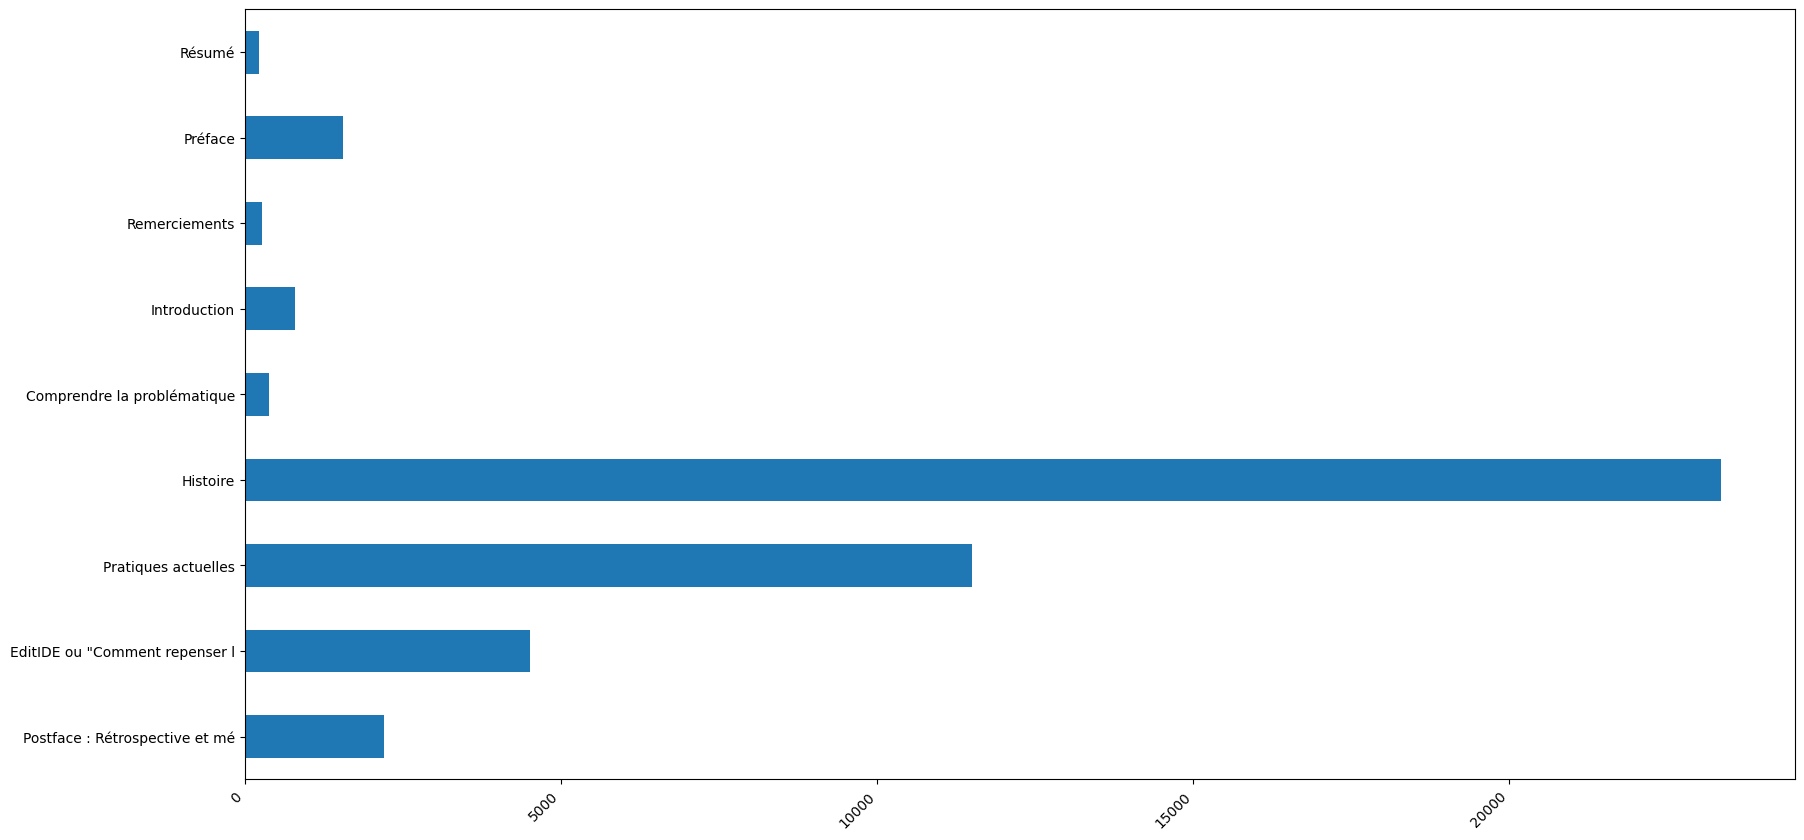

In [12]:
if "#" in charactersToRemove:
    charactersToRemove.remove("#")

formattedText = initialText

formattedText = removeCharactersInText(charactersToRemove, formattedText)
formattedLines = formattedText.split("\n")

level = 0
chapters = { }
currentPath = ""

lvl2Title = "## "

omitList = [
    "## Bienvenue",
    "## Comment repenser la gestion de l'information pour moderniser l'expérience développeur ?",
    "## Table des illustrations",
    "## Annexes"
]

for line in formattedLines:
    if line.startswith(lvl2Title) and line not in omitList:
        currentPath = line.replace(lvl2Title, "")[:30];
        chapters[currentPath] = [];
    elif currentPath:
        chapters[currentPath].append(line);
        
    

for chapter in chapters.keys():
    wordList = splitTextToWords(chapters[chapter])
    print(chapter + " : " + str(len(wordList)))
    chapters[chapter] = len(wordList)

displaySerie(pan.Series(chapters), (20, 10), "barh")
